In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
## Data processing

In [6]:
## Training Image Processsing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [9]:
### Validation Image Preprocessing

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [11]:
training_set


<BatchDataset shapes: ((None, 128, 128, 3), (None, 38)), types: (tf.float32, tf.float32)>

In [9]:
for x, y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[111.5   98.5   92.5 ]
   [113.5  100.5   94.5 ]
   [109.5   96.5   90.5 ]
   ...
   [113.25  94.25  88.25]
   [105.25  86.25  80.25]
   [111.25  92.25  86.25]]

  [[110.5   97.5   91.5 ]
   [127.75 114.75 108.75]
   [125.5  112.5  106.5 ]
   ...
   [102.75  83.75  77.75]
   [108.75  89.75  83.75]
   [ 94.    75.    69.  ]]

  [[131.5  118.5  112.5 ]
   [122.75 109.75 103.75]
   [128.25 115.25 109.25]
   ...
   [110.    91.    85.  ]
   [105.5   86.5   80.5 ]
   [112.    93.    87.  ]]

  ...

  [[147.   139.   136.  ]
   [147.25 139.25 136.25]
   [149.25 141.25 138.25]
   ...
   [156.25 148.25 145.25]
   [152.75 144.75 141.75]
   [155.25 147.25 144.25]]

  [[154.25 146.25 143.25]
   [152.5  144.5  141.5 ]
   [152.   144.   141.  ]
   ...
   [154.75 146.75 143.75]
   [157.75 149.75 146.75]
   [160.25 152.25 149.25]]

  [[152.5  144.5  141.5 ]
   [152.   144.   141.  ]
   [153.5  145.5  142.5 ]
   ...
   [155.5  147.5  144.5 ]
   [159.   151.   148.  ]
   [159.75 151.75 14

In [10]:
## Build Model

In [11]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [12]:
model= Sequential()

In [13]:
## Building Convulation Layer

In [14]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1500, activation='relu'))

In [22]:
model.add(Dropout(0.4))

In [23]:
#Output layer
model.add(Dense(units=38, activation='softmax'))

In [24]:
## Compiling Model

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 128)       7

In [30]:
## Model Training


In [31]:
print(tf.config.list_physical_devices('GPU'))

[]


In [33]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 3069s 1s/step - loss: 1.4235 - accuracy: 0.5817 - val_loss: 0.4939 - val_accuracy: 0.8434
Epoch 2/10
2197/2197 [==============================] - 2909s 1s/step - loss: 0.4608 - accuracy: 0.8560 - val_loss: 0.3187 - val_accuracy: 0.8960
Epoch 3/10
2197/2197 [==============================] - 2980s 1s/step - loss: 0.2739 - accuracy: 0.9116 - val_loss: 0.2097 - val_accuracy: 0.9315
Epoch 4/10
2197/2197 [==============================] - 2862s 1s/step - loss: 0.1908 - accuracy: 0.9381 - val_loss: 0.1966 - val_accuracy: 0.9368
Epoch 5/10
2197/2197 [==============================] - 2870s 1s/step - loss: 0.1378 - accuracy: 0.9558 - val_loss: 0.1536 - val_accuracy: 0.9507
Epoch 6/10
2197/2197 [==============================] - 2846s 1s/step - loss: 0.1105 - accuracy: 0.9639 - val_loss: 0.1429 - val_accuracy: 0.9534
Epoch 7/10
2197/2197 [==============================] - 2895s 1s/step - loss: 0.0864 - accuracy: 0.9709 - val_loss: 0.1269 -

In [35]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [36]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.6.2
GPU Available: []


In [37]:
## model evaluation

In [38]:
### Model evaluation on training set

In [39]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 433s 197ms/step - loss: 0.0180 - accuracy: 0.9943


In [40]:
print(train_loss,train_acc)

0.017976855859160423 0.9943239092826843


In [41]:
### Model evaluation on validation set

In [42]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 109s 198ms/step - loss: 0.1055 - accuracy: 0.9693


In [43]:
print(val_loss,val_acc)

0.10549962520599365 0.9692692756652832


In [44]:
## Saving Model

In [45]:
model.save("trained_model.keras")

In [47]:
training_history.history

{'loss': [1.4234809875488281,
  0.4608466923236847,
  0.27385854721069336,
  0.1907779425382614,
  0.1377643495798111,
  0.1104869395494461,
  0.0863858163356781,
  0.07689042389392853,
  0.06644463539123535,
  0.05623447522521019],
 'accuracy': [0.5817056894302368,
  0.8560352921485901,
  0.9116295576095581,
  0.9380894899368286,
  0.9558290243148804,
  0.9638665914535522,
  0.9709083437919617,
  0.9749910831451416,
  0.9783199429512024,
  0.9817625880241394],
 'val_loss': [0.493853360414505,
  0.31865164637565613,
  0.20973077416419983,
  0.19658377766609192,
  0.15359923243522644,
  0.1428924947977066,
  0.1269456297159195,
  0.1510743647813797,
  0.14418594539165497,
  0.10549964010715485],
 'val_accuracy': [0.8434441089630127,
  0.8960277438163757,
  0.9314818978309631,
  0.9367744326591492,
  0.950717031955719,
  0.9533917307853699,
  0.9628955125808716,
  0.9545299410820007,
  0.9561233520507812,
  0.9692692756652832]}

In [56]:
# Recording Model History In json format
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [59]:
training_history.history['val_accuracy']

[0.8434441089630127,
 0.8960277438163757,
 0.9314818978309631,
 0.9367744326591492,
 0.950717031955719,
 0.9533917307853699,
 0.9628955125808716,
 0.9545299410820007,
 0.9561233520507812,
 0.9692692756652832]

In [61]:
# Accuracy Visualization

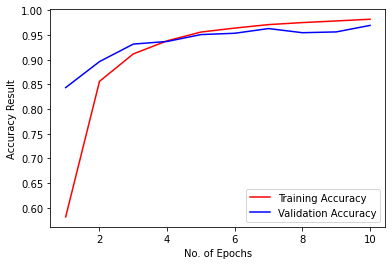

In [63]:
epochs = list(range(1, 11))  # Convert generator to list
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.legend()
plt.show()


In [65]:
# Some Other Matrix for model evaluation

In [67]:
class_names = validation_set.class_names  # Notice 'class_names' instead of 'class_name'
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [70]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [72]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

(array([[9.99999642e-01, 2.42877320e-07, 1.86483579e-10, ...,
         3.46169845e-16, 1.54404044e-14, 1.50827918e-13],
        [9.99990344e-01, 2.10586836e-06, 2.35949962e-08, ...,
         1.72274250e-13, 1.22871324e-10, 5.55276181e-09],
        [1.00000000e+00, 1.03107034e-08, 2.32233788e-09, ...,
         1.13063112e-15, 1.13654476e-11, 3.41524503e-10],
        ...,
        [1.18661941e-10, 1.01632487e-15, 1.04435967e-10, ...,
         1.02500846e-13, 1.63221108e-13, 9.99999642e-01],
        [3.40744204e-11, 2.84356531e-16, 2.26719754e-11, ...,
         1.13608199e-13, 1.10936257e-13, 1.00000000e+00],
        [5.22422038e-14, 5.80734350e-18, 2.55084023e-14, ...,
         7.13981065e-16, 5.61394193e-13, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [73]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [74]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [75]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [76]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [102]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [88]:
!pip install scikit-learn


In [114]:
import numpy as np
from sklearn.metrics import classification_report


In [116]:

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)




In [118]:
# Generate classification report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       504
           1       0.98      0.98      0.98       497
           2       0.99      0.97      0.98       440
           3       0.98      0.96      0.97       502
           4       0.97      0.98      0.98       454
           5       0.98      0.99      0.98       421
           6       0.98      0.98      0.98       456
           7       0.92      0.92      0.92       410
           8       0.99      0.99      0.99       477
           9       0.94      0.95      0.95       477
          10       0.99      0.99      0.99       465
          11       0.97      0.98      0.97       472
          12       0.99      0.98      0.98       480
          13       1.00      0.99      1.00       430
          14       0.98      1.00      0.99       423
          15       0.99      0.99      0.99       503
          16       0.98      0.93      0.95       459
          17       0.94    

In [110]:
##print( classification_report(y_true, y_pred, labels=None, target_names=None)) ##targetname not there (class_name)

In [120]:
from sklearn.metrics import confusion_matrix


In [124]:
##cm= confusion_matrix(y_true, y_pred)
##cm.shape


# Now generate the confusion matrix using class labels
cm = confusion_matrix(y_true, y_pred_classes)
print(cm.shape)


(38, 38)


In [126]:
### Confusion Matrix Visualization

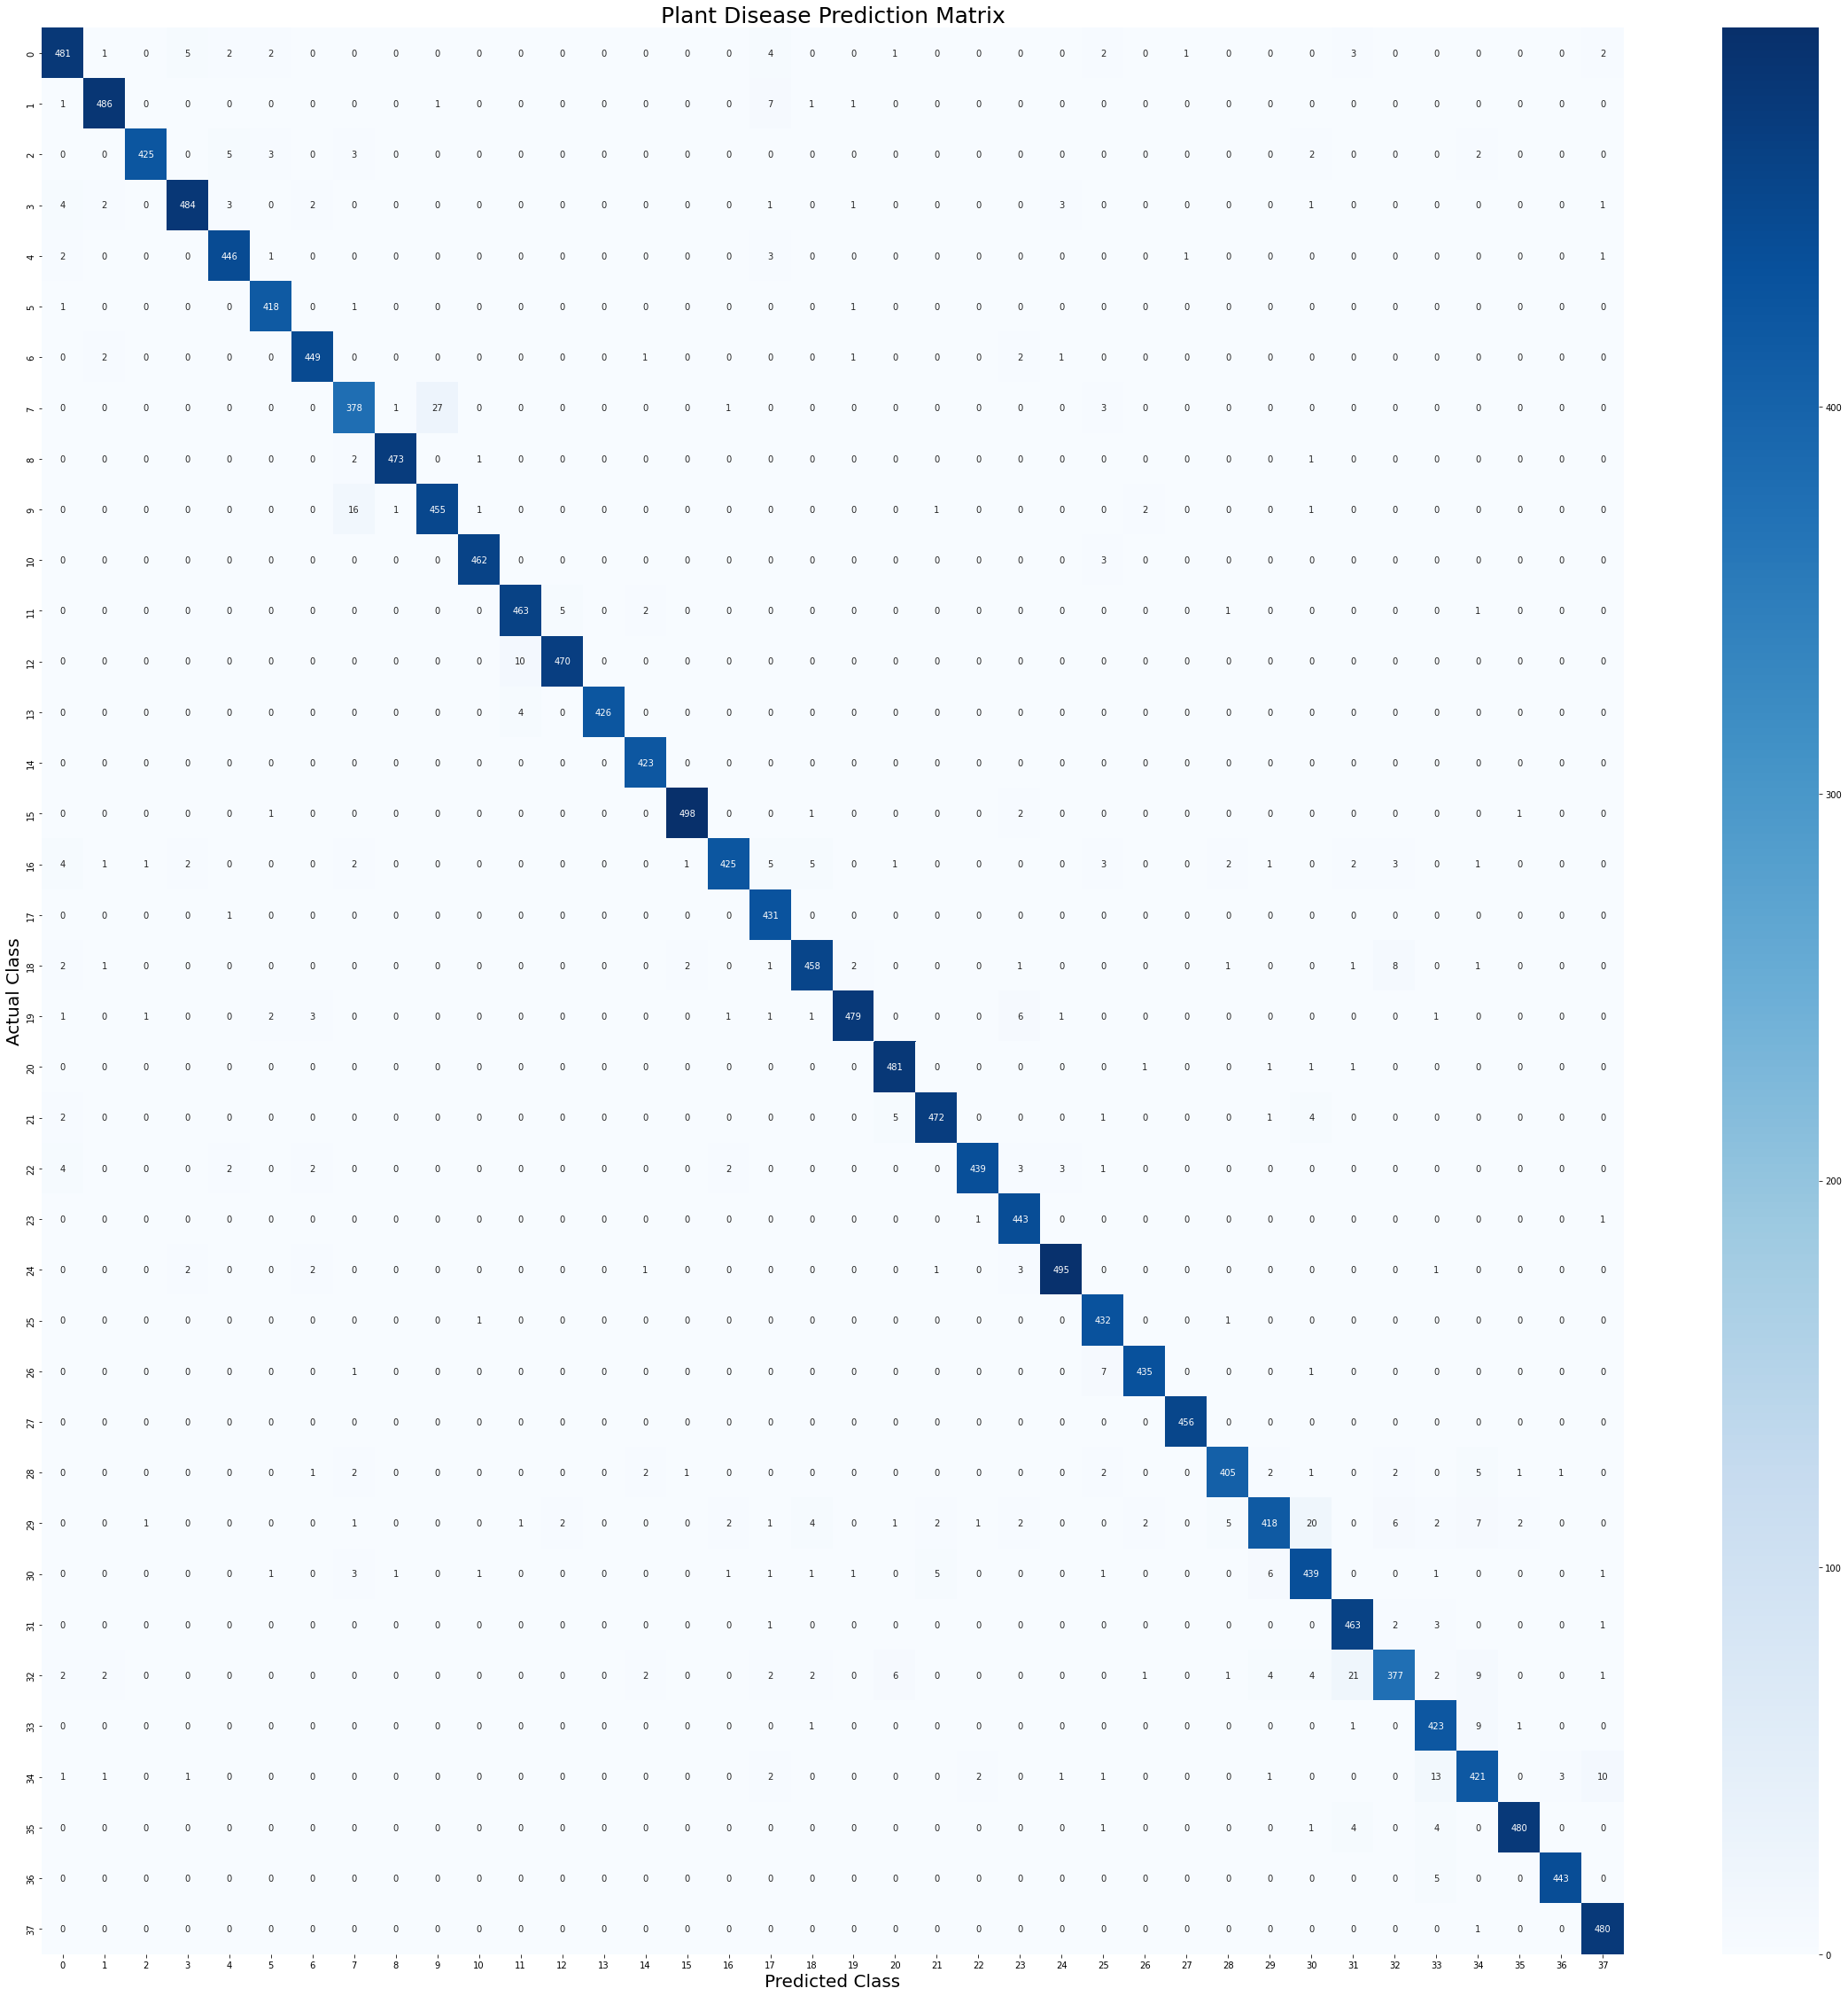

In [130]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Matrix", fontsize=25)
plt.show()

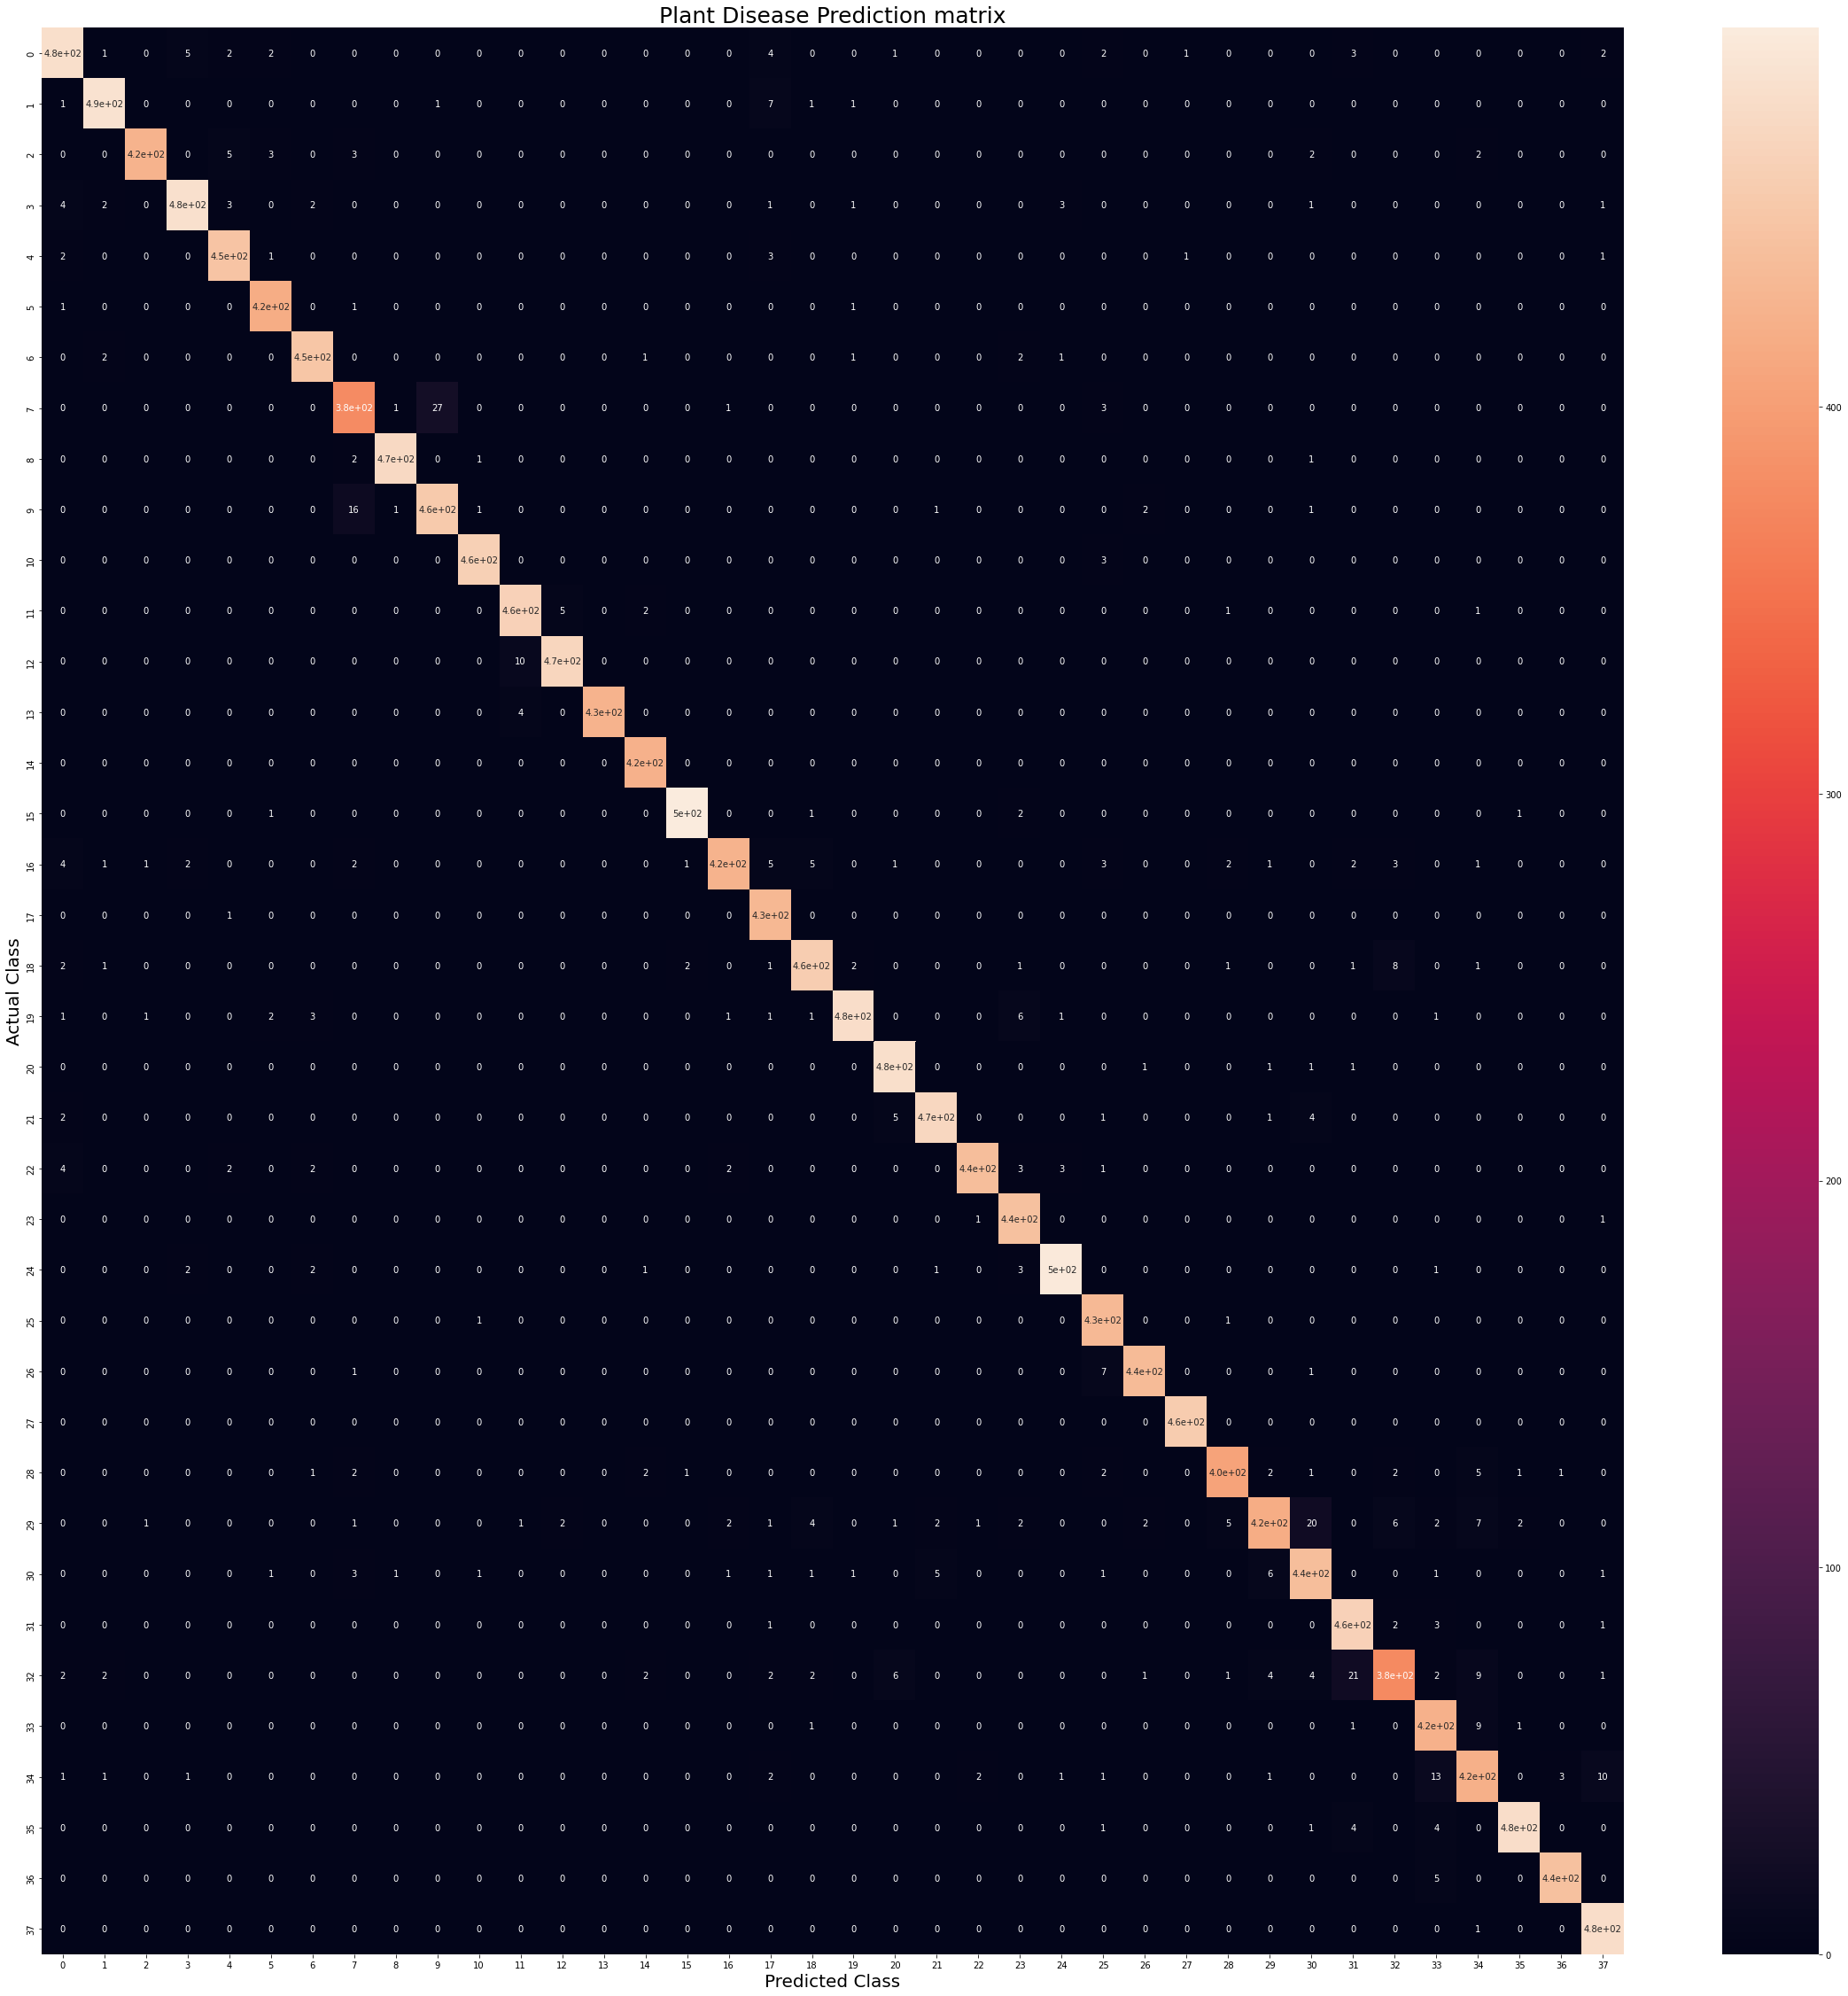

In [134]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size': 10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction matrix",fontsize=25)
plt.show()